In [1]:
import pulp

In [2]:
my_lp_problem = pulp.LpProblem("My LP Problem", pulp.LpMaximize)
x = pulp.LpVariable("x", lowBound = 0, cat = "Continuous")
y = pulp.LpVariable("y", lowBound = 0, cat = "Continuous")

# Objiective function
my_lp_problem += x + 2 * y

# Constraints
my_lp_problem += 4 * y <= 12 - 3 * x
my_lp_problem += 2 * y <= 2 + x

In [3]:
my_lp_problem

My LP Problem:
MAXIMIZE
1*x + 2*y + 0
SUBJECT TO
_C1: 3 x + 4 y <= 12

_C2: - x + 2 y <= 2

VARIABLES
x Continuous
y Continuous

In [4]:
my_lp_problem
my_lp_problem.solve()
pulp.LpStatus[my_lp_problem.status]

'Optimal'

In [5]:
for variable in my_lp_problem.variables():
    print("{}= {}".format(variable.name, variable.varValue))

print("Z =", pulp.value(my_lp_problem.objective))

x= 1.6
y= 1.8
Z = 5.2


# 畫圖

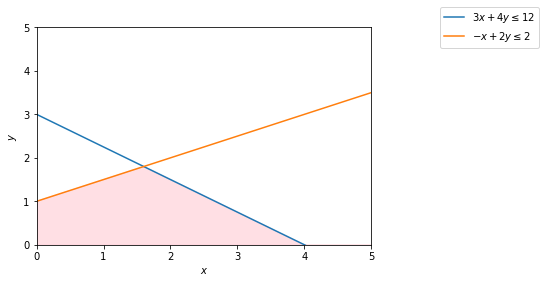

In [7]:
# Graphic

#Importing libraries of NumPy and Matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(0, 600, 10000)

#Constraints
y1 = (12-3*x)/4
y2 = (2+x)/2

# Make plot
plt.plot(x, y1, label=r'$3x+4y\leq12$')
plt.plot(x, y2, label=r'$-x+2y\leq2$')
plt.xlim((0, 5))
plt.ylim((0, 5))

#Labelling X and Y axis
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(bbox_to_anchor=(1.5, 1), loc=5, borderaxespad=0.)

# Fill feasible region
y3 = np.minimum(y2, y1)
plt.fill_between(x, y3, color='pink',alpha=0.5)